In [1]:
from run_vqe import run_vqe
import pennylane as qml
import numpy as np

In [2]:
name = 'h2'
geometry = 'h2.xyz'
charge = 0
multiplicity = 1
basis_set = 'sto-3g'

hamiltonian, nr_qubits = qml.qchem.generate_hamiltonian(
    name,
    geometry,
    charge,
    multiplicity,
    basis_set,
    n_active_electrons=2,
    n_active_orbitals=2,
    mapping='jordan_wigner'
)

dev = qml.device("default.qubit", wires=4)



def ansatz(params, wires=[0,1,2,3]):
    for i in wires:
        qml.RY(params[i], wires=wires[i])
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.CNOT(wires=[wires[2], wires[3]])
    qml.CNOT(wires=[wires[1], wires[2]])
    for i in wires:
        qml.RY(params[i+4], wires=wires[i])
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.CNOT(wires=[wires[2], wires[3]])
    qml.CNOT(wires=[wires[1], wires[2]])

FileNotFoundError: [Errno 2] No such file or directory: 'h2.xyz'

In [9]:
cost = qml.VQECost(ansatz, hamiltonian, dev)
init_params = np.random.uniform(low=0, high=2*np.pi, size=8)
max_iterations = 500
step_size = 0.5
conv_tol = 1e-06

In [10]:
print("QNG")
qng_run = run_vqe(cost_fn=cost, max_iter=max_iterations, initial_params=init_params, opt='QNGOptimizer', opt_step=0.05, diag_approx=True)
print("VANILLA GD")
vanilla_run = run_vqe(cost_fn=cost, max_iter=max_iterations, initial_params=init_params, opt='GradientDescentOptimizer', opt_step=0.05)


Iteration = 0,  Ground-state energy = -0.31442909 Ha,  Convergence parameter = 0.03790619 Ha
Iteration = 20,  Ground-state energy = -0.76679435 Ha,  Convergence parameter = 0.02193892 Ha
Iteration = 40,  Ground-state energy = -1.06055307 Ha,  Convergence parameter = 0.00569873 Ha
Iteration = 60,  Ground-state energy = -1.10464347 Ha,  Convergence parameter = 0.00077024 Ha
Iteration = 80,  Ground-state energy = -1.11223767 Ha,  Convergence parameter = 0.00018240 Ha
Iteration = 100,  Ground-state energy = -1.11440907 Ha,  Convergence parameter = 0.00006727 Ha
Iteration = 120,  Ground-state energy = -1.11535981 Ha,  Convergence parameter = 0.00003491 Ha
Iteration = 140,  Ground-state energy = -1.11590141 Ha,  Convergence parameter = 0.00002151 Ha
Iteration = 160,  Ground-state energy = -1.11625068 Ha,  Convergence parameter = 0.00001442 Ha
Iteration = 180,  Ground-state energy = -1.11649114 Ha,  Convergence parameter = 0.00001017 Ha
Iteration = 200,  Ground-state energy = -1.11666397 Ha, 

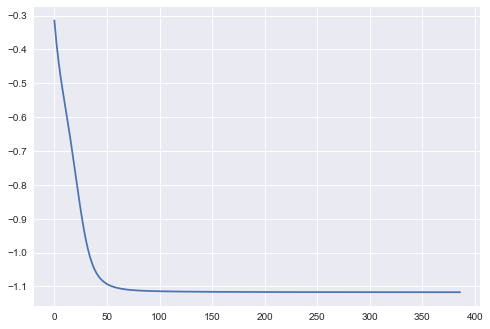

In [12]:
from matplotlib import pyplot as plt
plt.style.use("seaborn")
plt.plot(qng_run, color='b', label='QNG')
plt.plot(qng_run)